# A/B Test Challenge



---

#### What is an A/B Test? 

It is a decision making support & research methodology that allow you to measure an impact of a change in a product (e.g.: a digital product). For this challenge you will analyse the data resulting of an A/B test performed on a digital product where a new set of sponsored ads are included.


#### Measure of success

Metrics are need it to measure the success of your product. They are typically split in the following categories: 

- __Enganged based metrics:__ number of users, number of downloads, number of active users, user retention, etc.

- __Revenue and monetization metrics:__ ads and affiliate links, subscription-based, in-app purchases, etc.

- __Technical metrics:__ service level indicators (uptime of the app, downtime of the app, latency).



---

## Metrics understanding

In this part you must analyse the metrics involved in the test. We will focus in the following metrics:

- Activity level + Daily active users (DAU).

- Click-through rate (CTR)

### Activity level

In the following part you must perform every calculation you consider necessary in order to answer the following questions:

- How many activity levels you can find in the dataset (Activity level of zero means no activity).

- What is the amount of users for each activity level.

- How many activity levels do you have per day and how many records per each activity level.

At the end of this section you must provide your conclusions about the _activity level_ of the users.

__Dataset:__ `activity_pretest.csv`

In [1]:
# your-code

import pandas as pd

from statsmodels.stats.weightstats import ztest
from scipy import stats
import matplotlib.pyplot as plt

activity = pd.read_csv('./data/activity_pretest.csv')
activity.head()



,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0


In [2]:
#How many activity levels you can find in the dataset (Activity level of zero means no activity).

activity['activity_level'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [3]:
lst_activity = list(activity['activity_level'].unique())

In [4]:
lst_activity.remove(0)

In [5]:
print(f'There are {len(lst_activity)} different activity levels')

There are 20 different activity levels


In [6]:
#What is the amount of users for each activity level.

lst_activity_grouped = activity[['userid','activity_level']]
lst_activity_grouped = lst_activity_grouped.groupby(by = 'activity_level').count()
lst_activity_grouped

,userid
activity_level,
0,909125
1,48732
2,49074
3,48659
4,48556
5,49227
6,48901
7,48339
8,48396


In [7]:
#How many activity levels do you have per day and how many records per each activity level.

lst_activity_dt = activity.groupby(by = ['dt', 'activity_level'], as_index = False).count()
lst_activity_dt.head(22)

,dt,activity_level,userid
0,2021-10-01,0,29366
1,2021-10-01,1,1602
2,2021-10-01,2,1507
3,2021-10-01,3,1587
4,2021-10-01,4,1551
5,2021-10-01,5,1586
6,2021-10-01,6,1640
7,2021-10-01,7,1508
8,2021-10-01,8,1571
9,2021-10-01,9,1576


In [8]:
lst_activity_dt_al = lst_activity_dt[['dt','activity_level']]
lst_activity_dt_al = lst_activity_dt_al[lst_activity_dt_al['activity_level'] != 0]
lst_activity_dt_al = lst_activity_dt_al.groupby(by = 'dt', as_index = False).count()
lst_activity_dt_al

,dt,activity_level
0,2021-10-01,20
1,2021-10-02,20
2,2021-10-03,20
3,2021-10-04,20
4,2021-10-05,20
5,2021-10-06,20
6,2021-10-07,20
7,2021-10-08,20
8,2021-10-09,20
9,2021-10-10,20


### Daily active users (DAU)

![ab_test](./img/user_activity_ab_testinG.JPG)


The daily active users (DAU) refers to the amount of users that are active per day (activity level of zero means no activity). You must perform the calculation of this metric and provide your insights about it.

__Dataset:__ `activity_pretest.csv`

In [9]:
# your-code

DAU = activity
DAU

,userid,dt,activity_level
0,a5b70ae7-f07c-4773-9df4-ce112bc9dc48,2021-10-01,0
1,d2646662-269f-49de-aab1-8776afced9a3,2021-10-01,0
2,c4d1cfa8-283d-49ad-a894-90aedc39c798,2021-10-01,0
3,6889f87f-5356-4904-a35a-6ea5020011db,2021-10-01,0
4,dbee604c-474a-4c9d-b013-508e5a0e3059,2021-10-01,0
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [10]:
DAU = DAU[DAU['activity_level'] != 0]
DAU

,userid,dt,activity_level
909125,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1
909126,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1
909127,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1
909128,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,1
909129,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1
...,...,...,...
1859995,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,20
1859996,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,20
1859997,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,20
1859998,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,20


In [11]:
DAU_1 = DAU[['userid','dt']]
DAU_1 = DAU_1.groupby(by = 'dt', as_index=False).count()
dau = DAU_1['userid'].mean()
DAU_1.describe()

,userid
count,31.000000
mean,30673.387097
std,90.968375
min,30489.000000
25%,30608.000000
50%,30661.000000
75%,30728.500000
max,30902.000000


1


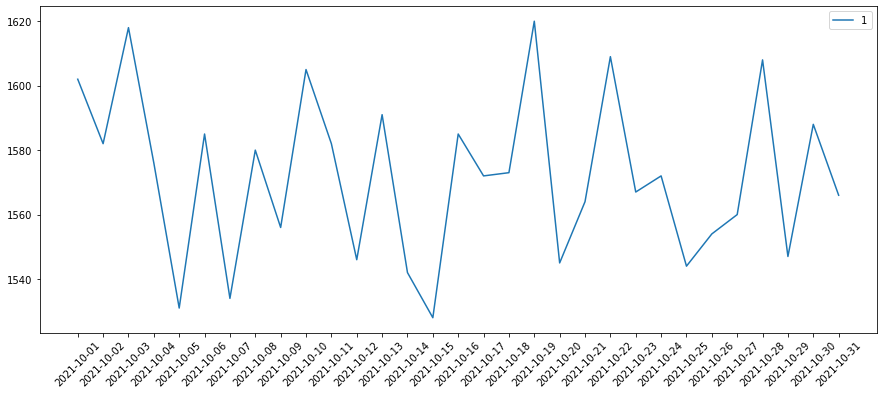

2


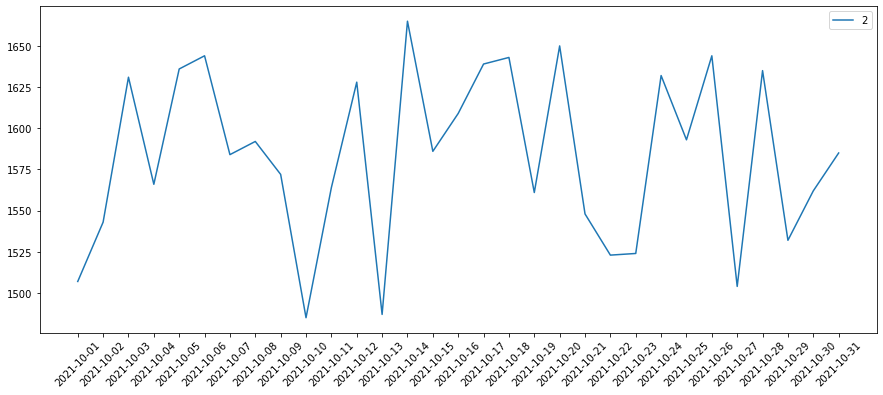

3


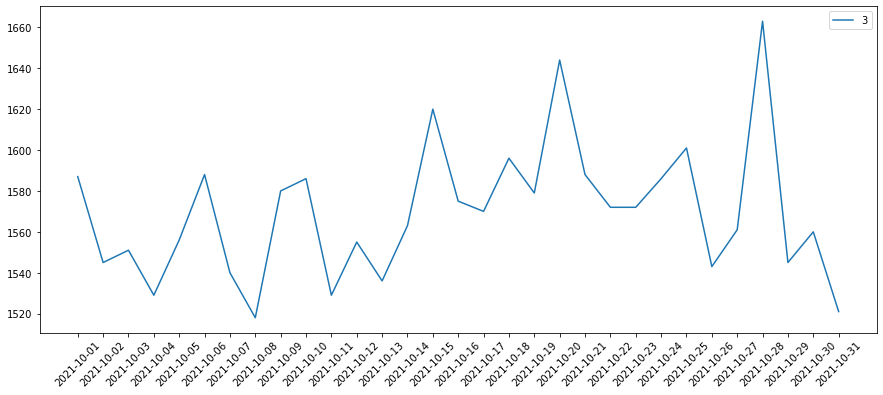

4


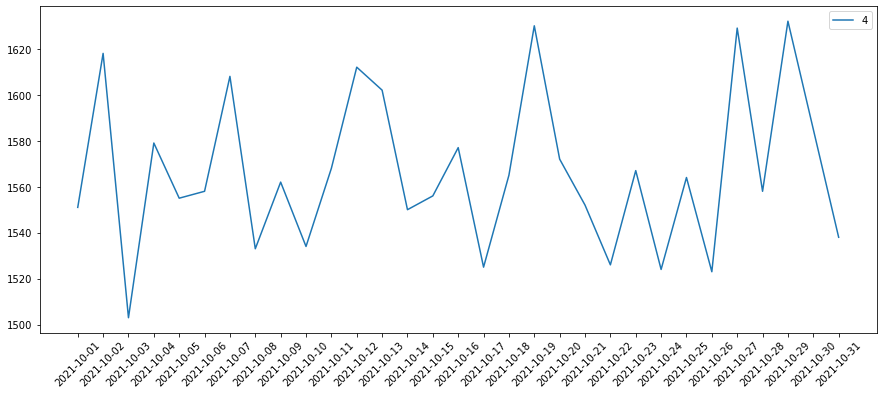

5


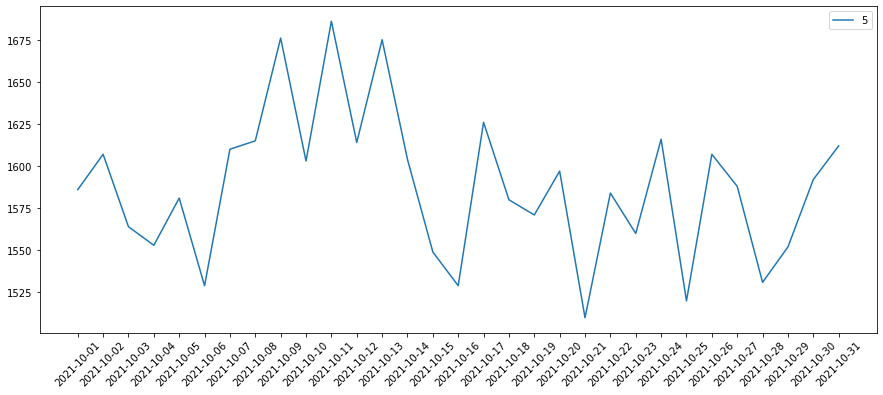

6


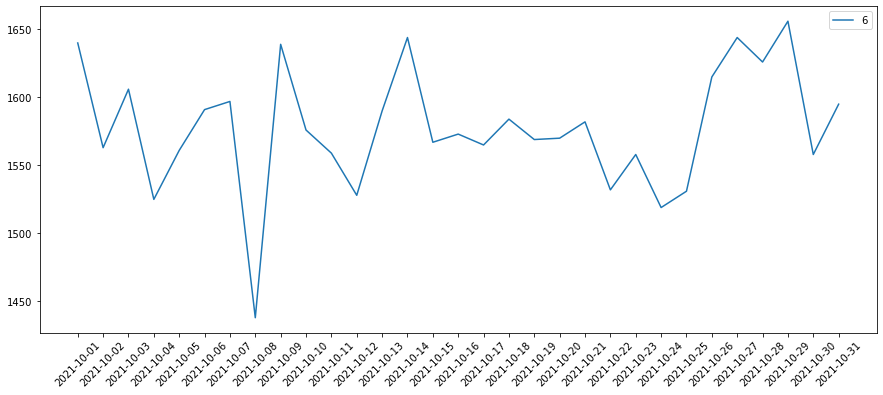

7


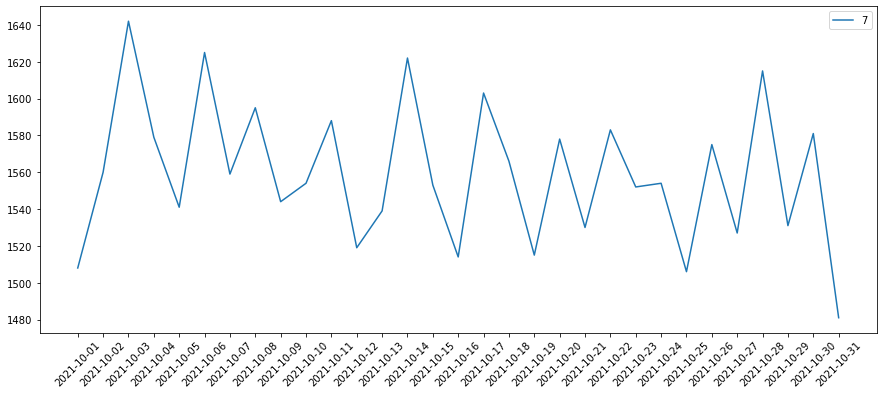

8


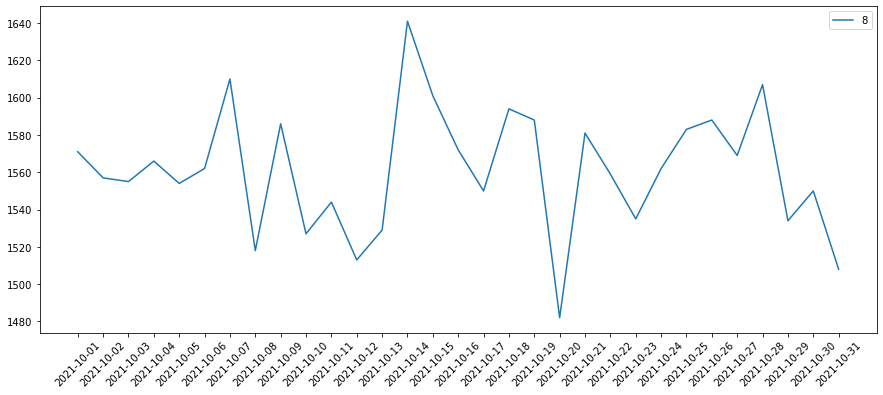

9


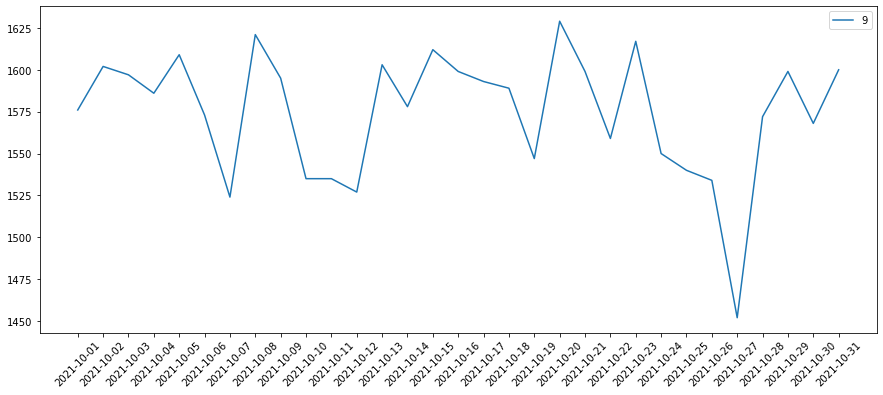

10


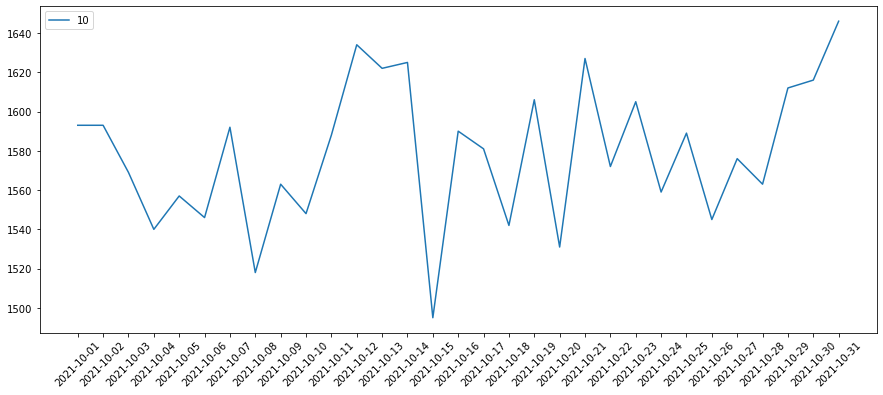

11


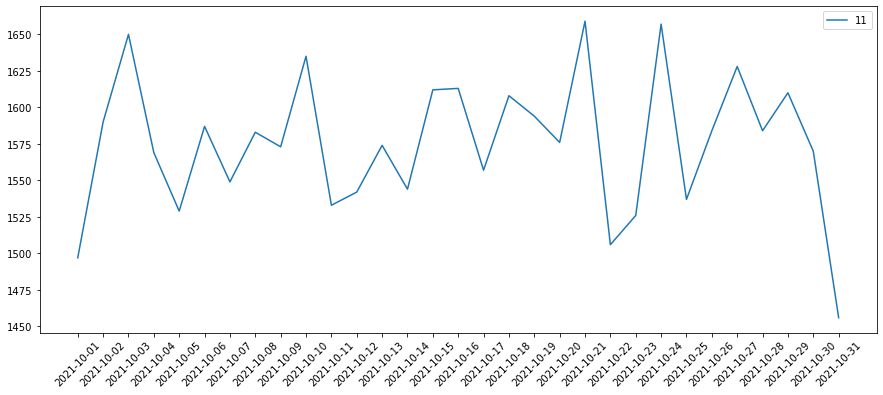

12


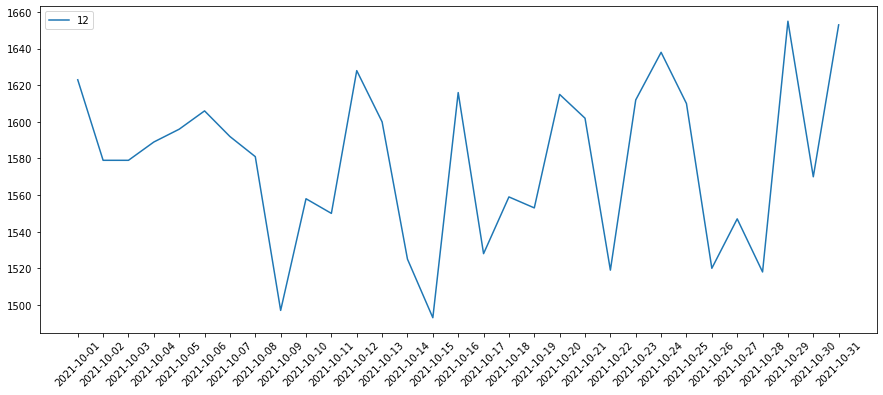

13


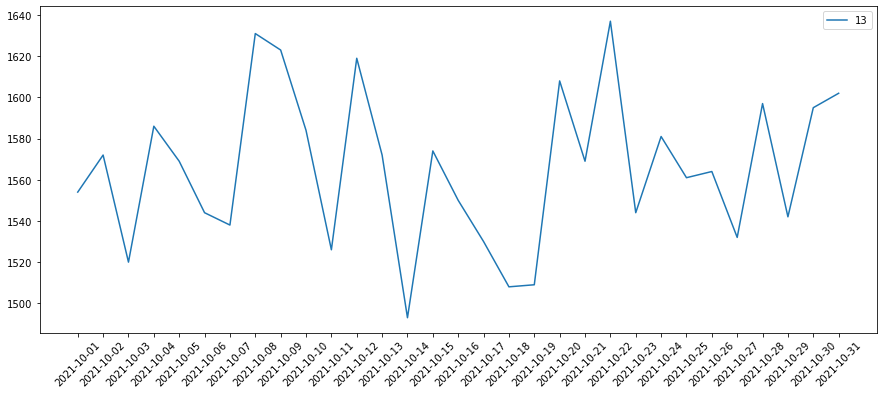

14


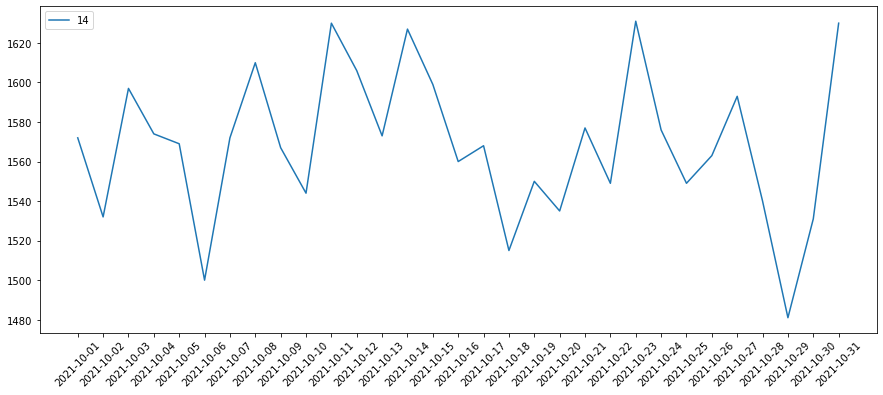

15


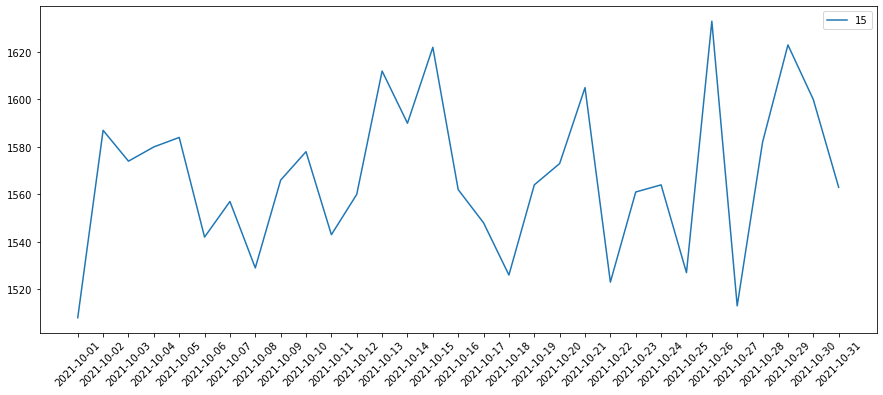

16


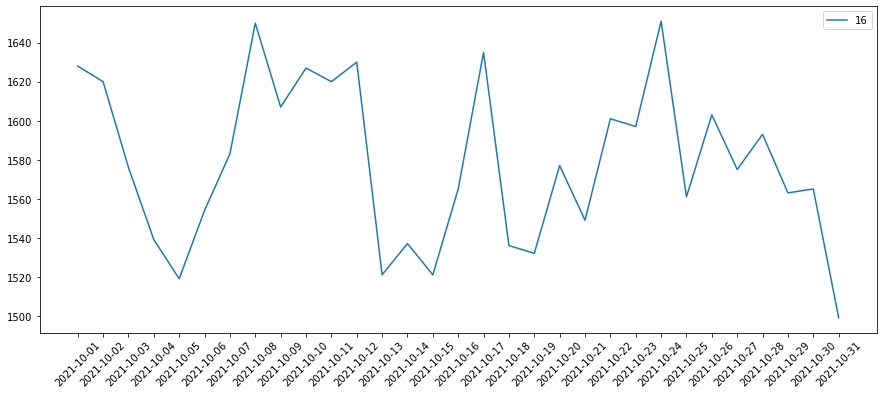

17


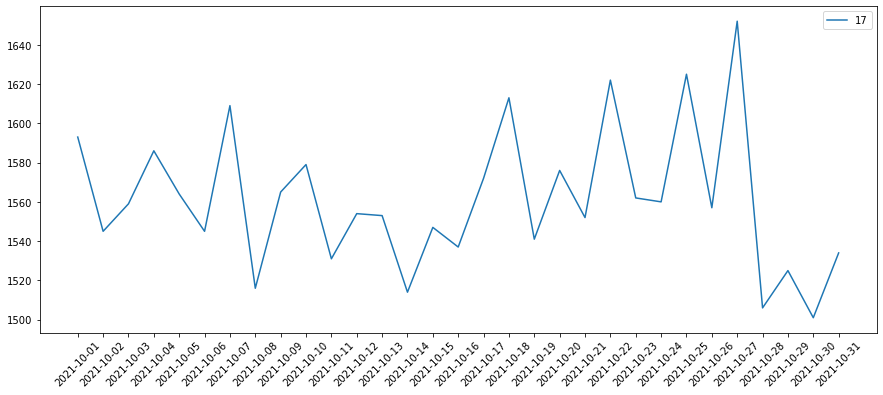

18


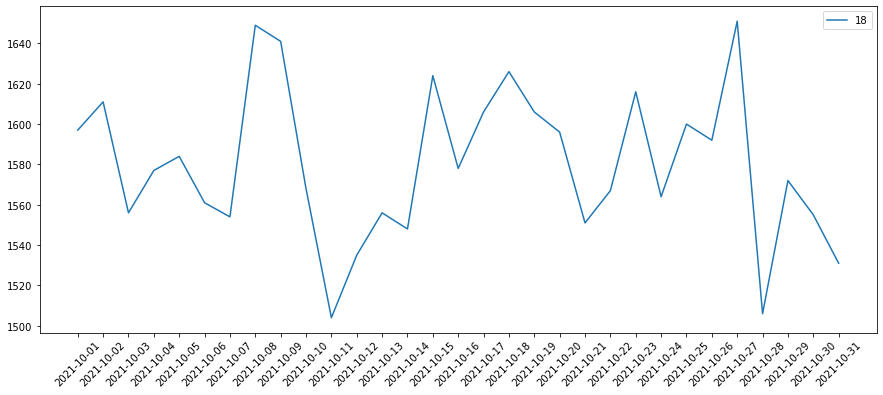

19


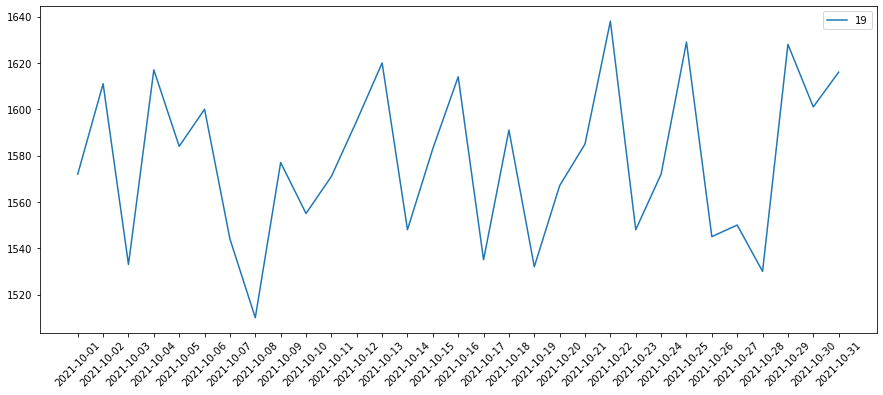

In [12]:
DAU_i = DAU.groupby(by = ['dt','activity_level'], as_index=False).count()

for i in range(1,20):
    print(i)
    DAU_2 = DAU_i
    DAU_2 = DAU_2[DAU_2['activity_level']==i]

    al_set = set(DAU_2['activity_level'])

    plt.figure(figsize=(15, 6))
    for al in al_set:
        selected_data = DAU_2.loc[DAU_2['activity_level'] == al]
        plt.plot(DAU_2['dt'], DAU_2['userid'], label=al)
     
    plt.legend()
    plt.xticks(rotation = 45)
    plt.show()

In [13]:
print(dau)

30673.387096774193


### Click-through rate (CTR)

![ab_test](./img/ad_click_through_rate_ab_testing.JPG)

Click-through rate (CTR) refers to the percentage of clicks that the user perform from the total amount ads showed to that user during a certain day. You must perform the analysis of this metric (e.g.: average CTR per day) and provide your insights about it.

__Dataset:__ `ctr_pretest.csv`

In [14]:
# your-code

ctr_df = pd.read_csv('./data/ctr_pretest.csv')
ctr_df.head()

,userid,dt,ctr
0,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,34.28
1,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,34.67
2,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,34.77
3,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,35.42
4,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,35.04


In [15]:
ctr_df['ctr'].describe()

count    950875.000000
mean         33.000242
std           1.731677
min          30.000000
25%          31.500000
50%          33.000000
75%          34.500000
max          36.000000
Name: ctr, dtype: float64

In [16]:
ctr_df_gr = ctr_df.groupby(by ='dt')['ctr'].mean()
ctr_df_gr

dt
2021-10-01    32.993446
2021-10-02    32.991664
2021-10-03    32.995086
2021-10-04    32.992995
2021-10-05    33.004375
2021-10-06    33.018564
2021-10-07    32.988500
2021-10-08    32.998654
2021-10-09    33.005082
2021-10-10    33.007134
2021-10-11    32.990300
2021-10-12    32.996166
2021-10-13    32.984248
2021-10-14    32.999878
2021-10-15    33.008517
2021-10-16    32.991025
2021-10-17    33.001919
2021-10-18    33.007763
2021-10-19    33.001511
2021-10-20    33.004632
2021-10-21    32.997566
2021-10-22    33.006785
2021-10-23    33.012228
2021-10-24    32.984093
2021-10-25    32.990223
2021-10-26    33.014248
2021-10-27    33.007045
2021-10-28    33.005711
2021-10-29    33.004230
2021-10-30    33.016430
2021-10-31    32.987515
Name: ctr, dtype: float64

In [17]:
ctr_df_gr_1 = ctr_df.groupby(by ='dt', as_index = False).mean()
ctr_df_gr_1['ctr'].mean()

33.00024304382362

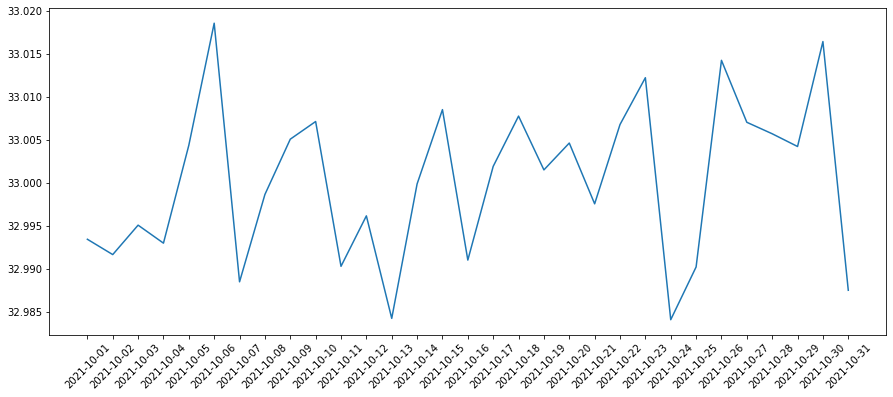

In [18]:
x = ctr_df_gr_1['dt']
y = ctr_df_gr_1['ctr']

plt.figure(figsize=(15, 6))
plt.plot(x, y)
plt.xticks(rotation = 45)
plt.show()

---

## Pretest metrics 

In this section you will perform the analysis of the metrics using the dataset that includes the result for the test and control groups, but only for the pretest data (i.e.: prior to November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups prior to the start of the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [80]:
# your-code

activity_all = pd.read_csv('./data/activity_all.csv')
ctr_all = pd.read_csv('./data/ctr_all.csv')

In [81]:
activity_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660000 entries, 0 to 3659999
Data columns (total 4 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   userid          object
 1   dt              object
 2   groupid         int64 
 3   activity_level  int64 
dtypes: int64(2), object(2)
memory usage: 111.7+ MB


In [82]:
activity_all['dt'].unique()

array(['2021-10-01', '2021-10-02', '2021-10-03', '2021-10-04',
       '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08',
       '2021-10-09', '2021-10-10', '2021-10-11', '2021-10-12',
       '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-16',
       '2021-10-17', '2021-10-18', '2021-10-19', '2021-10-20',
       '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
       '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
       '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01',
       '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05',
       '2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09',
       '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13',
       '2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17',
       '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
       '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
       '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
       '2021-11-30'], dtype=object)

In [83]:
activity_pretest = activity_all[activity_all['dt']<'2021-11-01']
activity_pretest = activity_pretest[activity_pretest['activity_level']!=0]
activity_pretest

,userid,dt,groupid,activity_level
1356592,428070b0-083e-4c0e-8444-47bf91e99fff,2021-10-01,1,1
1356593,93370f9c-56ef-437f-99ff-cb7c092d08a7,2021-10-01,1,1
1356594,0fb7120a-53cf-4a51-8b52-bf07b8659bd6,2021-10-01,1,1
1356595,ce64a9d8-07d9-4dca-908d-5e1e4568003d,2021-10-01,0,1
1356596,e08332f0-3a5c-4ed2-b957-87e464e89b97,2021-10-01,1,1
...,...,...,...,...
3625439,200d65e6-b1ce-4a47-8c2b-946db5c5a3a0,2021-10-31,0,20
3625440,535dafe4-de7c-4b56-acf6-aa94f21653bc,2021-10-31,1,20
3625441,0428ca3c-e666-4ef4-8588-3a2af904a123,2021-10-31,1,20
3625442,a8cd1579-44d4-48b3-b3d6-47ae5197dbc6,2021-10-31,0,20


In [84]:
ctr_pretest = ctr_all[ctr_all['dt']<'2021-11-01']
ctr_pretest

,userid,dt,groupid,ctr
808703,4b328144-df4b-47b1-a804-09834942dce0,2021-10-01,0,34.28
808704,34ace777-5e9d-40b3-a859-4145d0c35c8d,2021-10-01,0,34.67
808705,8028cccf-19c3-4c0e-b5b2-e707e15d2d83,2021-10-01,0,34.77
808706,652b3c9c-5e29-4bf0-9373-924687b1567e,2021-10-01,0,35.42
808707,45b57434-4666-4b57-9798-35489dc1092a,2021-10-01,0,35.04
...,...,...,...,...
1759573,a09a3687-b71a-4a67-b1ef-9b05c9770c4c,2021-10-31,1,32.33
1759574,c843a595-b94c-42e1-b2fe-ec096070681e,2021-10-31,1,30.09
1759575,edcdf0c1-3d8f-47e8-b7dd-05505749eb69,2021-10-31,1,35.71
1759576,76b7a9ae-98fa-4c77-869d-594a4ef7282d,2021-10-31,1,34.76


In [85]:
group1_activity = activity_pretest[activity_pretest['groupid']==1]
group0_activity = activity_pretest[activity_pretest['groupid']==0]
group1_ctr = ctr_pretest[ctr_pretest['groupid']==1]
group0_ctr = ctr_pretest[ctr_pretest['groupid']==0]

In [86]:
group1_activity_levels = group1_activity['activity_level'].values
group0_activity_levels = group0_activity['activity_level'].values
print(group1_activity_levels)
print(group1_activity_levels.mean())

[ 1  1  1 ... 20 20 20]
10.257950782471298


In [87]:
Z_score, p_value = ztest(group1_activity_levels, group0_activity_levels)
p_value

0.7831520549245693

In [88]:
stats.ttest_ind(a=group1_activity_levels, b=group0_activity_levels, equal_var=True)

Ttest_indResult(statistic=0.27521370941856227, pvalue=0.7831521147228401)

In [89]:
group1_dau = group1_activity[group1_activity['activity_level']>0]
group1_dau = group1_dau[['userid','dt']]
group1_dau = group1_dau.groupby(by = 'dt', as_index=False).count()


group0_dau = group0_activity[group0_activity['activity_level']>0]
group0_dau = group0_dau[['userid','dt']]
group0_dau = group0_dau.groupby(by = 'dt', as_index=False).count()


print(group1_dau.mean())
print(group0_dau.mean())

userid    15352.516129
dtype: float64
userid    15320.870968
dtype: float64


/var/folders/mm/6t2s2cdd51n6bvy65ffxy6r40000gn/T/ipykernel_32353/734030659.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(group1_dau.mean())
/var/folders/mm/6t2s2cdd51n6bvy65ffxy6r40000gn/T/ipykernel_32353/734030659.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(group0_dau.mean())


In [90]:
Z_score, p_value = ztest(group1_dau['userid'], group0_dau['userid'])
p_value

0.15791859802311015

In [91]:
stats.ttest_ind(a=group1_dau['userid'], b=group0_dau['userid'], equal_var=True)

Ttest_indResult(statistic=1.4121065242323187, pvalue=0.1630842353828083)

In [92]:
group1_ctr = group1_ctr['ctr'].values
group0_ctr = group0_ctr['ctr'].values

In [93]:
Z_score, p_value = ztest(group1_ctr, group0_ctr)
p_value

0.7057413330705573

In [94]:
stats.ttest_ind(a=group1_ctr, b=group0_ctr, equal_var=True)

Ttest_indResult(statistic=-0.3775817380268587, pvalue=0.705741417344299)

---

## Experiment metrics 

In this section you must perform the same analysis as in the previous section, but using the data generated during the experiment (i.e.: after November 1st, 2021). You must provide insights about the metrics (__Activity level__, __DAU__ and __CTR__) and also perform an hyphotesis test in order to determine whether there is any statistical significant difference between the groups during the experiment. You must try different approaches (i.e.: __z-test__ and __t-test__) and compare the results.


__Datasets:__ `activity_all.csv`, `ctr_all.csv`

In [96]:
# your-code

activity_all = pd.read_csv('./data/activity_all.csv')
ctr_all = pd.read_csv('./data/ctr_all.csv')

In [102]:
activity_test = activity_all[activity_all['dt']>'2021-11-01']
activity_test = activity_test[activity_test['activity_level']!=0]
activity_test

,userid,dt,groupid,activity_level
1407621,8c5618b0-773d-44e0-98e3-028f1d71dc46,2021-11-02,0,1
1407622,0042f20e-11f3-4a49-8e07-f4d3eea3fb59,2021-11-02,0,1
1407623,a740525f-6f43-49eb-aabb-7b9bd8172159,2021-11-02,0,1
1407624,7d9beec5-f06b-45c5-9bd5-0394b6ffa1d9,2021-11-02,1,1
1407625,4486cf25-44f6-444c-b737-f0e6d046cf1f,2021-11-02,0,1
...,...,...,...,...
3659995,f0126b50-ad74-4480-9250-41b50a408932,2021-11-30,0,20
3659996,6ffe1efe-2e5d-427f-95ff-cc862c46c798,2021-11-30,1,20
3659997,f2073207-25dd-4127-a893-b70106d5ead7,2021-11-30,0,20
3659998,0416f2be-3ab8-481b-873c-3678b4705ecf,2021-11-30,1,20


In [103]:
ctr_test = ctr_all[ctr_all['dt']>'2021-11-01']
ctr_test

,userid,dt,groupid,ctr
0,60389fa7-2d71-4cdf-831c-c2bb277ffa1e,2021-11-13,0,31.81
1,b59cb225-d160-4851-92d2-7cc8120a2f63,2021-11-13,0,30.46
2,aa336050-934e-453f-a5b0-dd881fcd114e,2021-11-13,0,34.25
3,8df767f4-a10f-4322-a722-676b7e02b372,2021-11-13,0,34.92
4,a74762ed-4da0-42ab-91d2-40d7e808dfe9,2021-11-13,0,34.95
...,...,...,...,...
2303403,932e0348-ea2d-4b98-8782-aa84420f0796,2021-11-12,1,37.27
2303404,6775a825-6d3d-4dc3-9335-cad061736752,2021-11-12,1,39.14
2303405,a7b55365-21f1-4123-b2b5-485a8c7b98da,2021-11-12,1,40.05
2303406,a6fa937c-6f40-4f04-b15b-f1de09e179db,2021-11-12,1,38.14


In [104]:
group1_activity = activity_test[activity_test['groupid']==1]
group0_activity = activity_test[activity_test['groupid']==0]
group1_ctr = ctr_test[ctr_test['groupid']==1]
group0_ctr = ctr_test[ctr_test['groupid']==0]

In [105]:
group1_activity_levels = group1_activity['activity_level'].values
group0_activity_levels = group0_activity['activity_level'].values
print(group1_activity_levels)
print(group1_activity_levels.mean())
print(group0_activity_levels.mean())

[ 1  1  1 ... 20 20 20]
10.249120040482257
10.252881603424042


In [106]:
Z_score, p_value = ztest(group1_activity_levels, group0_activity_levels)
p_value

0.7159158287460562

In [107]:
stats.ttest_ind(a=group1_activity_levels, b=group0_activity_levels, equal_var=True)

Ttest_indResult(statistic=-0.3639225719576132, pvalue=0.715915887602655)

In [108]:
group1_dau = group1_activity[group1_activity['activity_level']>0]
group1_dau = group1_dau[['userid','dt']]
group1_dau = group1_dau.groupby(by = 'dt', as_index=False).count()


group0_dau = group0_activity[group0_activity['activity_level']>0]
group0_dau = group0_dau[['userid','dt']]
group0_dau = group0_dau.groupby(by = 'dt', as_index=False).count()


print(group1_dau.mean())
print(group0_dau.mean())

userid    29301.896552
dtype: float64
userid    15774.862069
dtype: float64


/var/folders/mm/6t2s2cdd51n6bvy65ffxy6r40000gn/T/ipykernel_32353/734030659.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(group1_dau.mean())
/var/folders/mm/6t2s2cdd51n6bvy65ffxy6r40000gn/T/ipykernel_32353/734030659.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(group0_dau.mean())


In [109]:
Z_score, p_value = ztest(group1_dau['userid'], group0_dau['userid'])
p_value

0.0

In [110]:
stats.ttest_ind(a=group1_dau['userid'], b=group0_dau['userid'], equal_var=True)

Ttest_indResult(statistic=193.32338800889534, pvalue=8.420789588054738e-81)

In [111]:
group1_ctr = group1_ctr['ctr'].values
group0_ctr = group0_ctr['ctr'].values

In [112]:
Z_score, p_value = ztest(group1_ctr, group0_ctr)
p_value

0.0

In [113]:
stats.ttest_ind(a=group1_ctr, b=group0_ctr, equal_var=True)

Ttest_indResult(statistic=1573.5041094694232, pvalue=0.0)

---

## Conclusions

Please provide your conclusions after the analyses and your recommendation whether we may or may not implement the changes in the digital product.

In [41]:
# your-conclusions


"""After the statistical analysis, we can confirm with 95% of confidence that the test have a significant effect 
on traffic to the website and on the ctr but has no effect on the activity levels. """

---